In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os




In [36]:
data = pd.read_csv("/Users/jeffhitt/Desktop/TestData/Resources/Police_Department_Incidents.csv")

In [60]:
data.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [38]:
data.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374
150499,179002868,OTHER OFFENSES,"FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...",Friday,12/02/2016 12:00:00 AM,14:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",17900286809024


In [39]:
data.Category.value_counts().iloc[:20]


LARCENY/THEFT             40409
OTHER OFFENSES            19599
NON-CRIMINAL              17866
ASSAULT                   13577
VANDALISM                  8589
VEHICLE THEFT              6419
WARRANTS                   5914
BURGLARY                   5802
SUSPICIOUS OCC             5782
MISSING PERSON             4338
DRUG/NARCOTIC              4243
ROBBERY                    3299
FRAUD                      2635
SECONDARY CODES            1841
TRESPASS                   1812
WEAPON LAWS                1658
SEX OFFENSES, FORCIBLE      940
STOLEN PROPERTY             882
RECOVERED VEHICLE           736
DISORDERLY CONDUCT          658
Name: Category, dtype: int64

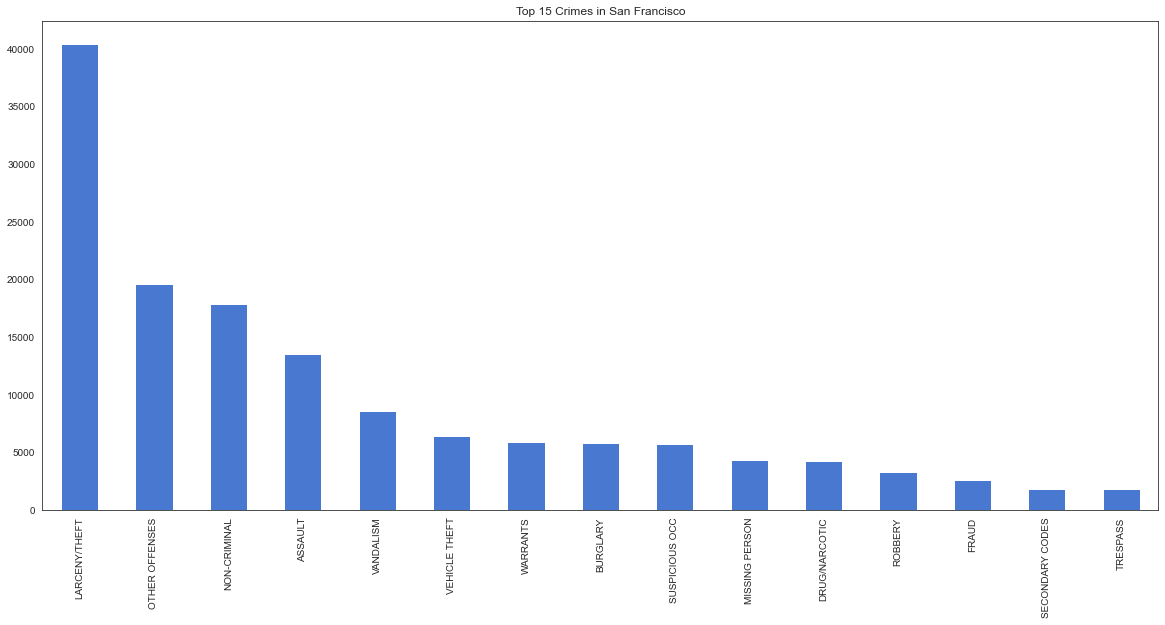

In [40]:
plt.rcParams['figure.figsize'] = (20, 9)
              
sns.set_palette("muted")
sns.set_style("white")

data.Category.value_counts().iloc[:15].sort_values(ascending=False).plot.bar(x='Category', y='Total', title='Top 15 Crimes in San Francisco')

In [41]:
larceny = data[data.Category.str.contains('LARCENY/THEFT')]
larceny.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/02/2016 12:00:00 AM,17:39,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,-122.408421,37.783570,"(37.7835699386918, -122.408421116922)",16000483706362
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Tuesday,02/16/2016 12:00:00 AM,12:40,INGLESIDE,NONE,3300 Block of MISSION ST,-122.421128,37.743555,"(37.7435550542265, -122.421128029505)",16013865206362
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,01/04/2016 12:00:00 AM,19:40,MISSION,NONE,2300 Block of 16TH ST,-122.409530,37.765718,"(37.7657184395282, -122.409529913278)",16001050506244
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,01/05/2016 12:00:00 AM,14:00,PARK,NONE,DIVISADERO ST / HAYES ST,-122.437800,37.774991,"(37.7749912944366, -122.437799703468)",16001202806244


In [42]:
larceny = data[data.Category.str.contains('LARCENY/THEFT')]
larceny.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/02/2016 12:00:00 AM,17:39,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,-122.408421,37.783570,"(37.7835699386918, -122.408421116922)",16000483706362
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Tuesday,02/16/2016 12:00:00 AM,12:40,INGLESIDE,NONE,3300 Block of MISSION ST,-122.421128,37.743555,"(37.7435550542265, -122.421128029505)",16013865206362
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,01/04/2016 12:00:00 AM,19:40,MISSION,NONE,2300 Block of 16TH ST,-122.409530,37.765718,"(37.7657184395282, -122.409529913278)",16001050506244
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,01/05/2016 12:00:00 AM,14:00,PARK,NONE,DIVISADERO ST / HAYES ST,-122.437800,37.774991,"(37.7749912944366, -122.437799703468)",16001202806244


In [43]:
district = larceny.groupby('PdDistrict').size().sort_values(ascending = False)
district.head()


PdDistrict
SOUTHERN    9203
NORTHERN    7219
CENTRAL     6740
MISSION     3321
RICHMOND    3133
dtype: int64

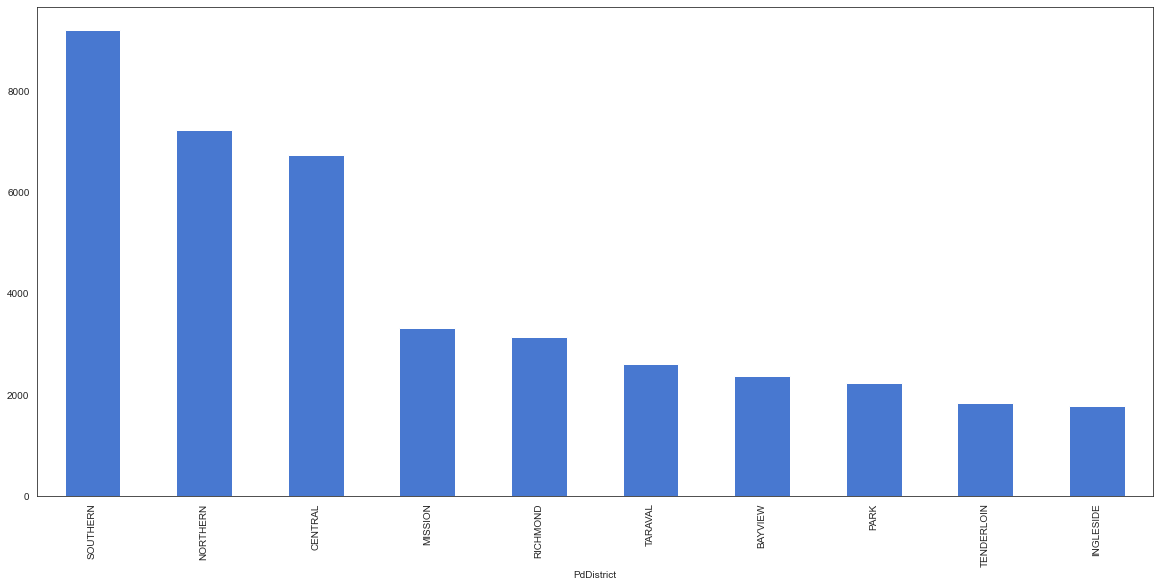

In [44]:
larceny.groupby('PdDistrict').size().sort_values(ascending = False).plot.bar(x='Category', y='Total')

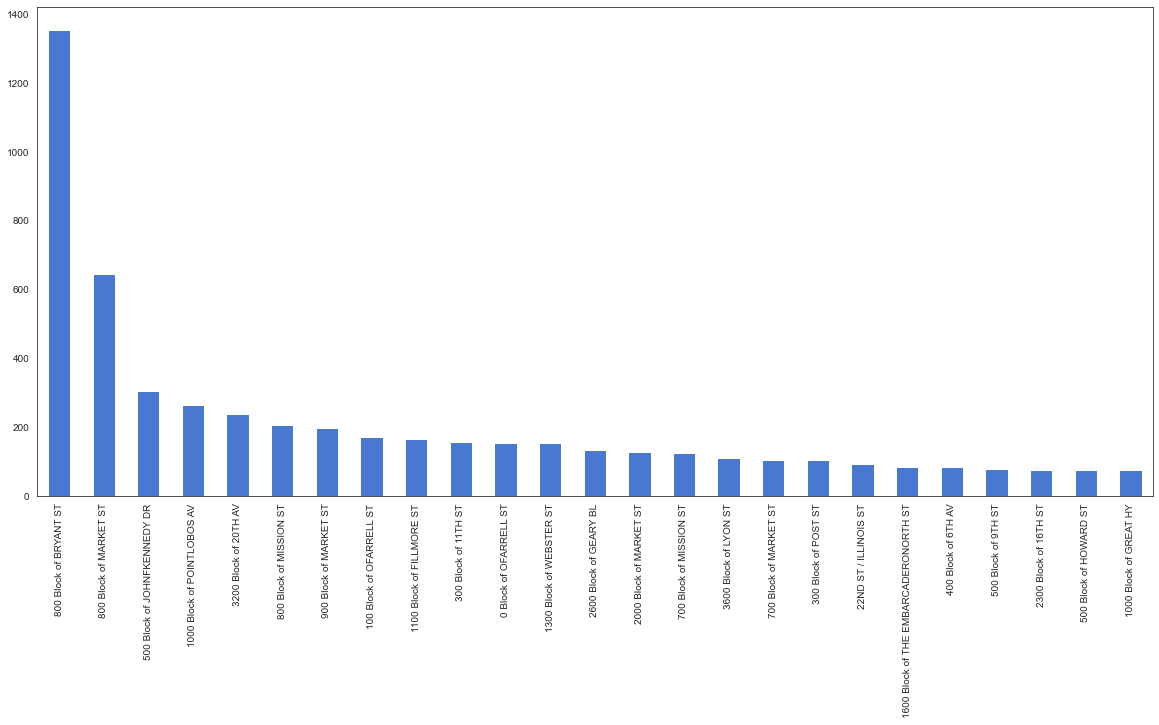

In [45]:
larceny.Address.value_counts()[:25].sort_values(ascending=False).plot.bar(x='Category', y='Total')


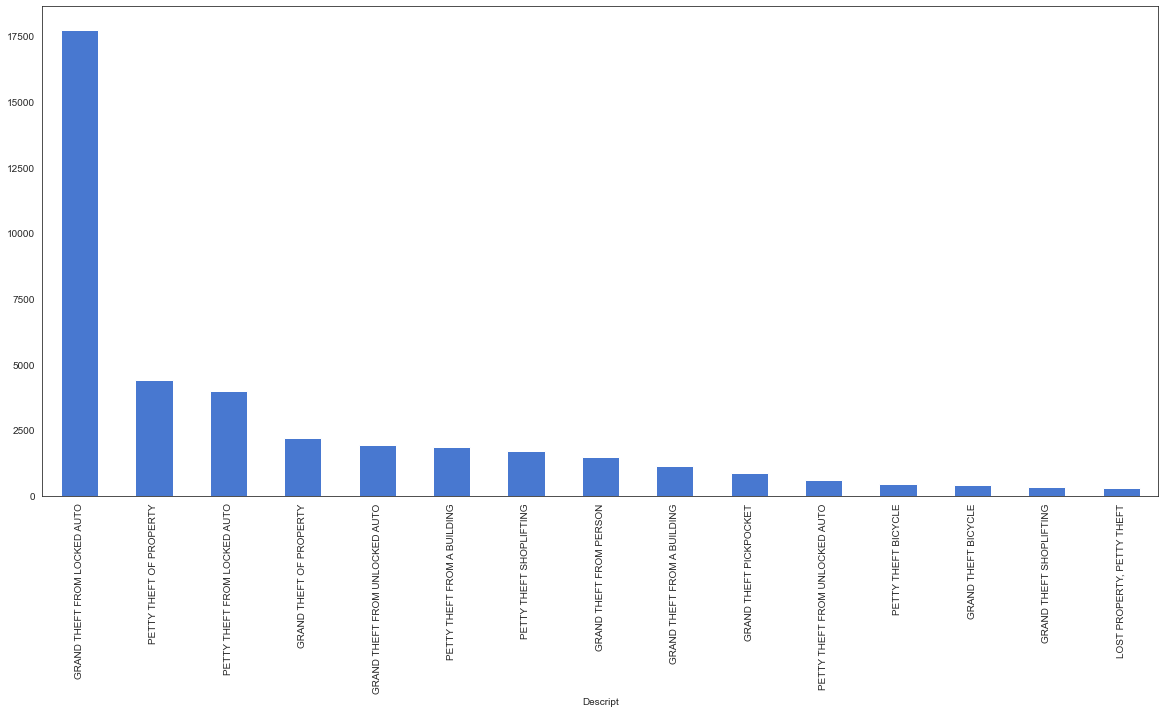

In [46]:
larceny.groupby('Descript').size().sort_values(ascending = False).iloc[:15].plot.bar(x='Category', y='Total')


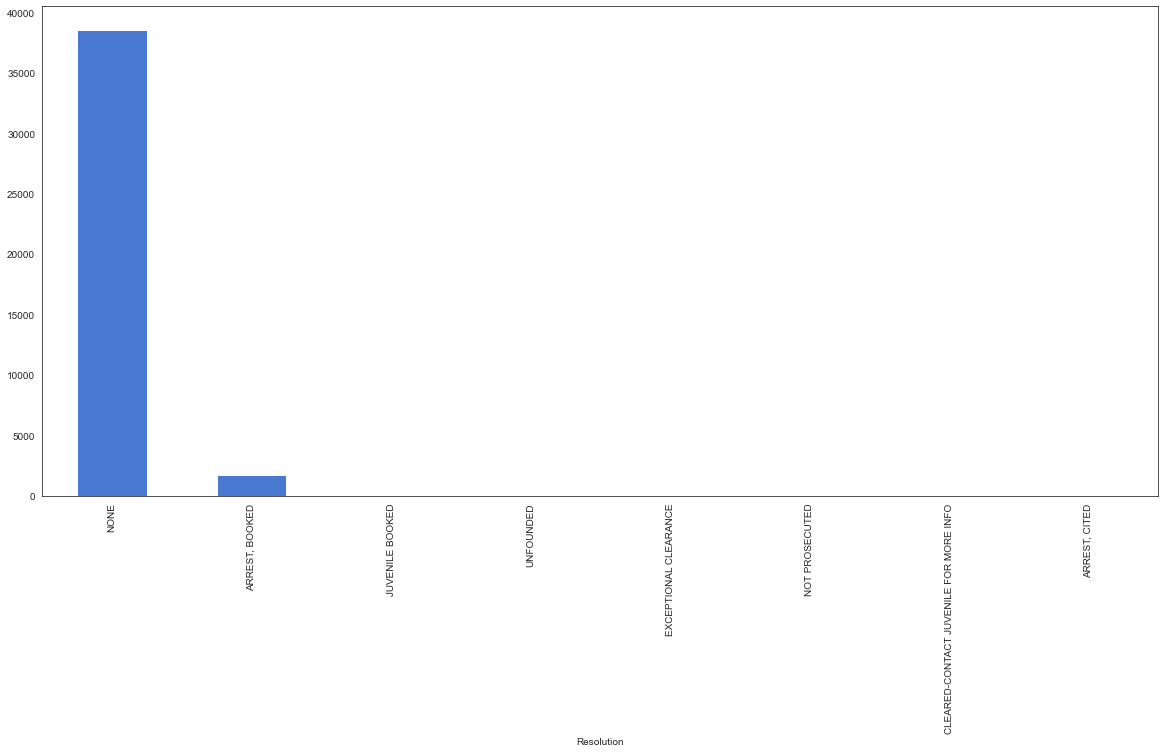

In [47]:
larceny.groupby('Resolution').size().sort_values(ascending = False).plot.bar(x='Category', y='Total')

In [48]:
resolution0 = data[data.Resolution.str.contains('NONE')]
resolution.head()

NameError: name 'resolution' is not defined

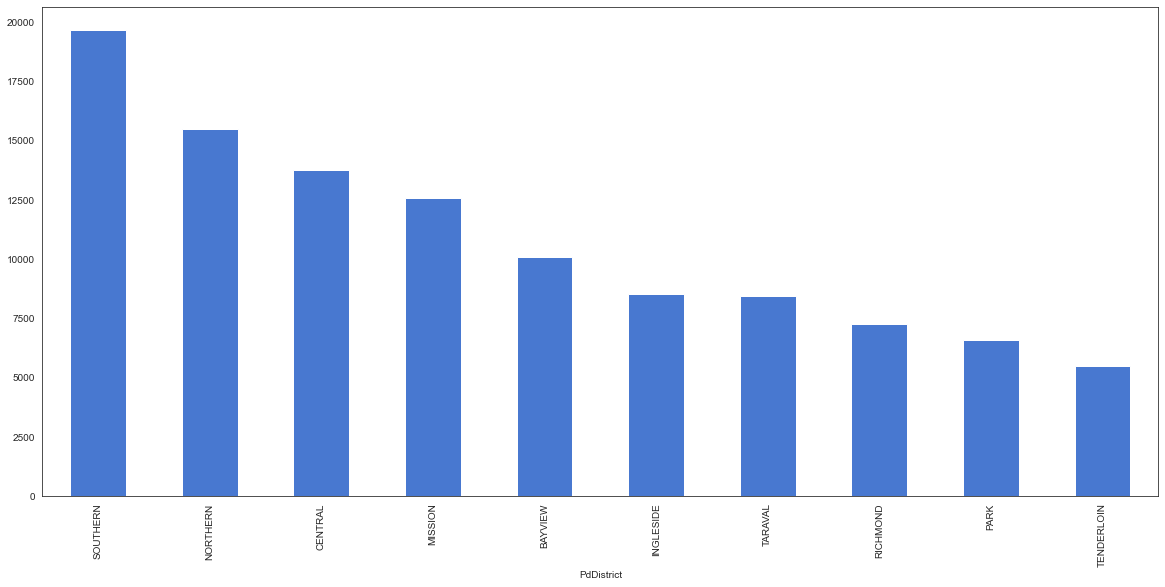

In [49]:
resolution0.groupby('PdDistrict').size().sort_values(ascending = False).plot.bar(x='Category', y='Total')


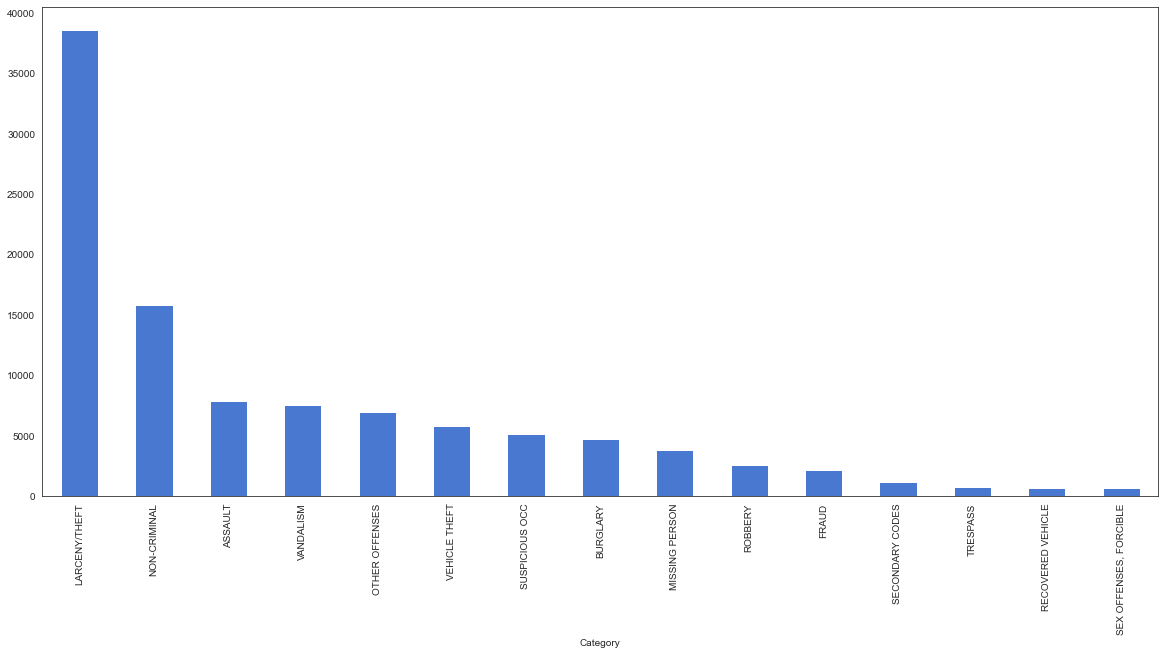

In [52]:
resolution0.groupby('Category').size().sort_values(ascending = False).iloc[:15].plot.bar(x='Category', y='Total')


In [53]:
resolutionarrest = data[data.Resolution.str.contains('CITED|BOOKED')]
resolutionarrest.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150408,160711098,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Friday,09/02/2016 12:00:00 AM,02:00,TARAVAL,"ARREST, BOOKED",300 Block of NAGLEE AV,-122.450612,37.715293,"(37.7152933552367, -122.450611662739)",16071109804138
150409,160711098,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Friday,09/02/2016 12:00:00 AM,02:00,TARAVAL,"ARREST, BOOKED",300 Block of NAGLEE AV,-122.450612,37.715293,"(37.7152933552367, -122.450611662739)",16071109828100
150416,160711151,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Friday,09/02/2016 12:00:00 AM,06:50,NORTHERN,"ARREST, BOOKED",2400 Block of SACRAMENTO ST,-122.433800,37.789810,"(37.7898100005704, -122.433800051784)",16071115104138
150422,160784625,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,09/27/2016 12:00:00 AM,12:55,MISSION,"ARREST, BOOKED",TREAT AV / ALAMEDA ST,-122.412424,37.768074,"(37.7680741693848, -122.412424364002)",16078462565010
150435,160865156,ASSAULT,BATTERY,Monday,10/24/2016 12:00:00 AM,08:33,RICHMOND,"ARREST, BOOKED",400 Block of 6TH AV,-122.464280,37.780033,"(37.7800332991006, -122.464279879446)",16086515604134


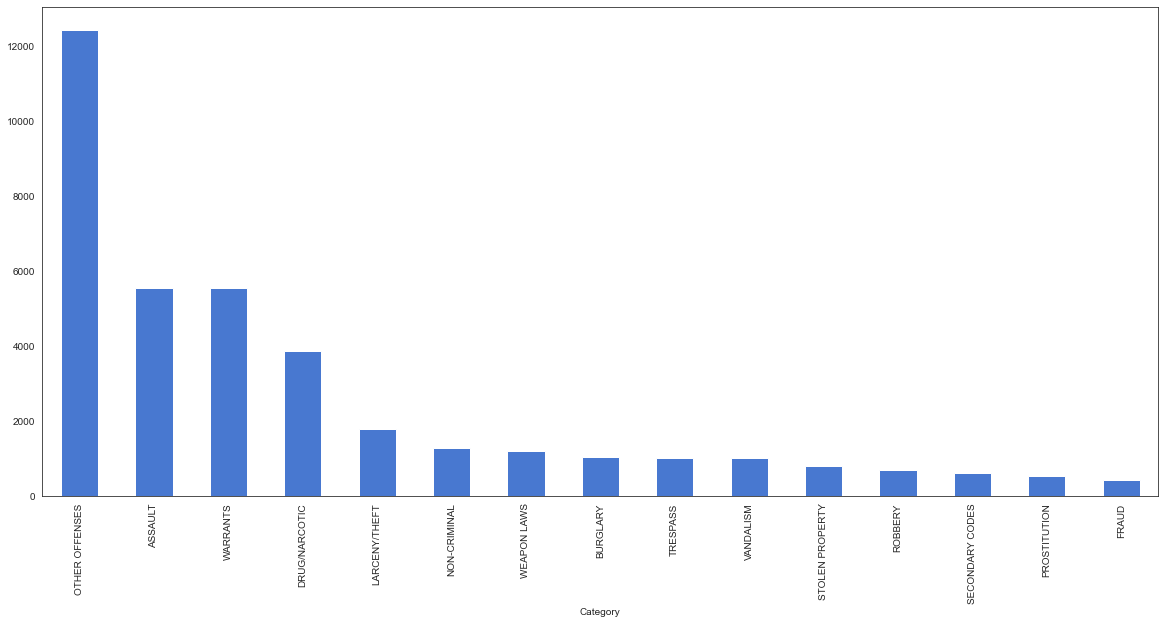

In [54]:
resolutionarrest.groupby('Category').size().sort_values(ascending = False).iloc[:15].plot.bar(x='Category', y='Total')


In [55]:
resolutionarrestother = resolutionarrest[resolutionarrest.Category.str.contains('OTHER OFFENSES')]
resolutionarrestother.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
12,160073014,OTHER OFFENSES,RESISTING ARREST,Monday,01/25/2016 12:00:00 AM,23:20,BAYVIEW,"ARREST, BOOKED",200 Block of HUNTERSPOINT BL,-122.376758,37.735697,"(37.7356970275482, -122.37675765553)",16007301427170
23,160005841,OTHER OFFENSES,PROBATION VIOLATION,Sunday,01/03/2016 12:00:00 AM,06:50,MISSION,"ARREST, BOOKED",23RD ST / FOLSOM ST,-122.414234,37.754099,"(37.7540986882068, -122.414233849038)",16000584126170
25,160006598,OTHER OFFENSES,VIOLATION OF STAY AWAY ORDER,Sunday,01/03/2016 12:00:00 AM,15:09,TARAVAL,"ARREST, BOOKED",0 Block of CAMBON DR,-122.474445,37.718302,"(37.718302204766, -122.474444639595)",16000659815162
28,160006952,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Sunday,01/03/2016 12:00:00 AM,17:02,MISSION,"ARREST, BOOKED",26TH ST / TREAT AV,-122.412690,37.749369,"(37.7493688284532, -122.412690142308)",16000695265010


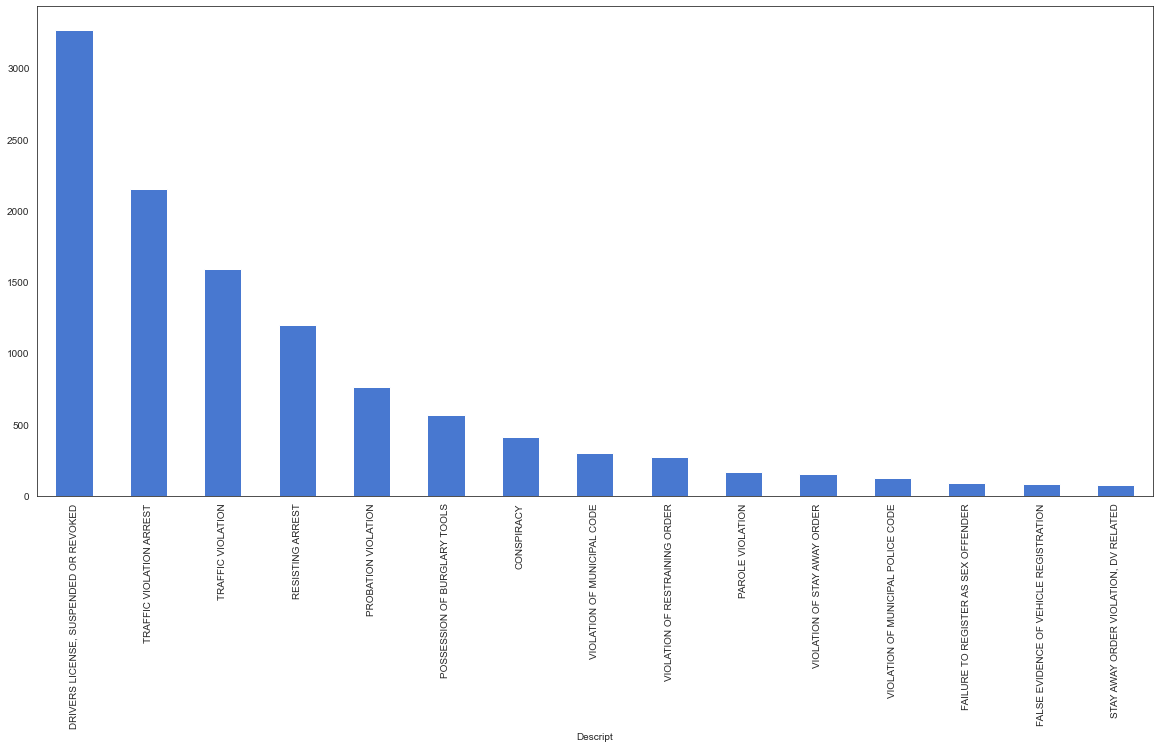

In [56]:
resolutionarrestother.groupby('Descript').size().sort_values(ascending = False).iloc[:15].plot.bar(x='Category', y='Total')


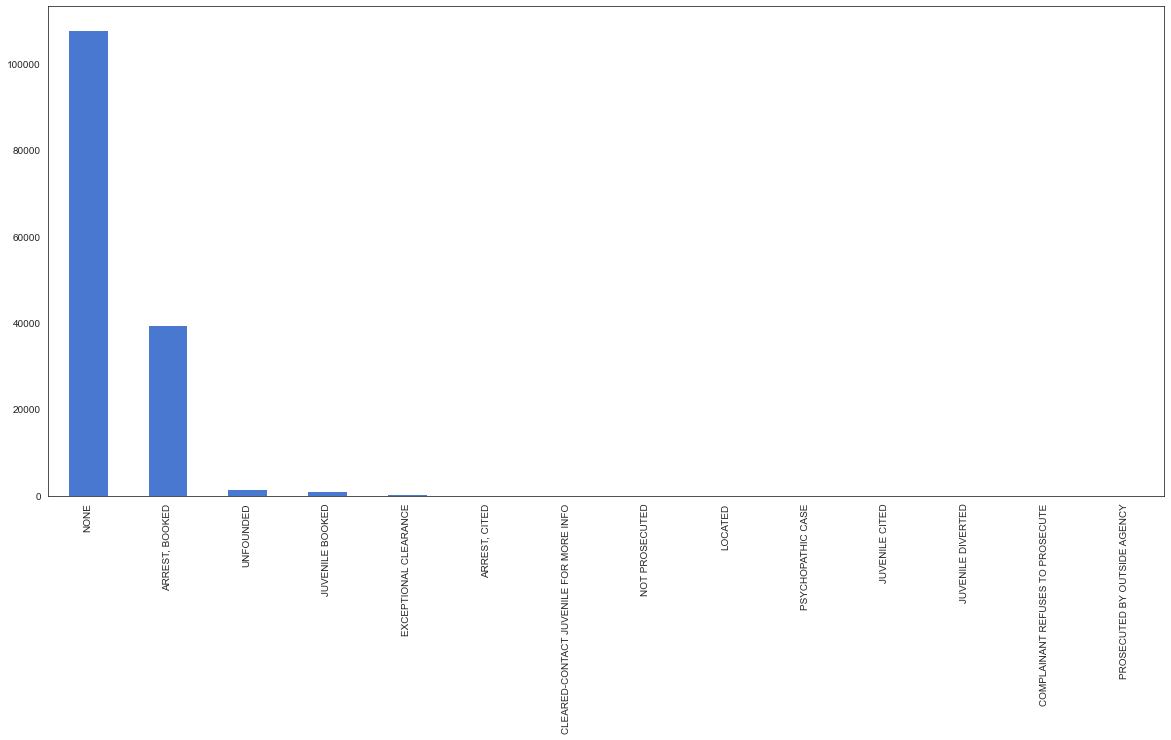

In [57]:
data.Resolution.value_counts().sort_values(ascending=False).iloc[:15].plot.bar(x='Category', y='Total')
